<a href="https://colab.research.google.com/github/shishirjain/Company_Data_Assignments_Solutions/blob/main/Sample_survey_assignment_Dhruvresearch_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**1. Load the dataset into a pandas dataframe. Name the variable as “survey”.**


In [ ]:
survey=pd.read_excel('/content/Sample Survey.xlsx',sheet_name='Data')

In [ ]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [ ]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   object        
 6   Past_Vote         6867 non-null   object        
 7   CM_satisfaction   6867 non-null   object        
 8   MLA_satisfaction  6867 non-null   object        
 9   age               6867 non-null   object        
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

**2. How many samples were collected on each day?**

In [ ]:
survey.collection_date.value_counts()

2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: collection_date, dtype: int64

**3. What proportion of the total respondents were aged less than 45?**

In [ ]:
survey['age']=pd.to_numeric(survey['age'],errors='coerce')

Proportion=len(survey.loc[survey['age']<45.0])/len(survey)
Proportion

0.9317023445463812

**4. Create a new column in the dataframe “age_group”. This column should contain the age
group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+. Thedataframe should look like this after the column creation:** 

In [ ]:
max(survey.age)

99.0

In [ ]:
bins=[18,25,40,55,100]
labels=['18-25', '25-40', '40-55','55+']
survey['age-group']=pd.cut(survey.age,bins=bins,labels=labels,right=False)
column=['response_id','age','age-group']
survey[column].head()

,response_id,age,age-group
0,1,26.0,25-40
1,2,34.0,25-40
2,3,25.0,25-40
3,4,36.0,25-40
4,5,22.0,18-25


**5. How many samples were collected for each age-group? Which age-group had the most
samples?**

In [ ]:
survey['age-group'].value_counts()

25-40    3844
18-25    2093
40-55     801
55+       128
Name: age-group, dtype: int64

In [ ]:
survey['age-group'].value_counts().idxmax()

'25-40'

**6. What proportion of the respondents had opted for the RJD party in both the Vote_Now
and the Past_Vote questions?**

In [ ]:
Proportion_RJD_now_and_past=len(survey.loc[(survey['Vote_Now']=='RJD') & (survey['Past_Vote']=='RJD')])/len(survey)
Proportion_RJD_now_and_past

0.1181010630551915

**7. For each day of sample collection, determine the proportion of respondents who were
fully satisfied with the performance of the CM. So if there were a total of 1000 samples
on day 1 and 300 out of those said they were fully satisfied, then our answer for that day
would be 0.3.**

In [ ]:
(survey.CM_satisfaction=='Fully Satisfied').groupby(survey['collection_date']).agg(lambda x:x.sum()/len(x)).reset_index(name='Ratio')

,collection_date,Ratio
0,2020-08-24,0.098715
1,2020-08-25,0.095190
2,2020-08-26,0.098662
3,2020-08-27,0.081203
4,2020-08-28,0.120894
5,2020-08-29,0.117742
6,2020-08-30,0.111684
7,2020-08-31,0.111311
8,2020-09-01,0.123558


In [ ]:
df_total=survey.groupby('collection_date')['CM_satisfaction'].agg(['size'])
df_fully_satisfied=survey[survey['CM_satisfaction']=='Fully Satisfied'].groupby('collection_date')['CM_satisfaction'].agg(['size'])
df=df_total.merge(df_fully_satisfied,on='collection_date',suffixes=('_total','_fully_satisfied'))
df['ratio']=df.size_fully_satisfied/df.size_total
df

,size_total,size_fully_satisfied,ratio
collection_date,,,
2020-08-24,1479,146,0.098715
2020-08-25,998,95,0.095190
2020-08-26,598,59,0.098662
2020-08-27,665,54,0.081203
2020-08-28,761,92,0.120894
2020-08-29,620,73,0.117742
2020-08-30,582,65,0.111684
2020-08-31,557,62,0.111311
2020-09-01,607,75,0.123558


**8. In a similar fashion create a day-wise proportion of respondents that opted fully
dissatisfied with their MLA. Create a line plot of the result with date on x-axis and
proportions on the y-axis.**

In [ ]:
Ratio_df=(survey.MLA_satisfaction=='Fully Dissatisfied').groupby(survey['collection_date']).agg(lambda x:x.sum()/len(x)).reset_index(name='Ratio')
Ratio_df

,collection_date,Ratio
0,2020-08-24,0.599730
1,2020-08-25,0.631263
2,2020-08-26,0.590301
3,2020-08-27,0.606015
4,2020-08-28,0.607096
5,2020-08-29,0.564516
6,2020-08-30,0.620275
7,2020-08-31,0.576302
8,2020-09-01,0.634267


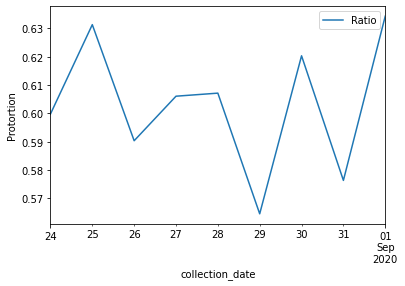

In [ ]:
Ratio_df.plot(x='collection_date',y='Ratio',ylabel='Protortion',)

**9. Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and
cell values as the count of samples.**

In [ ]:
pd.crosstab(columns=survey['Vote_Now'],index=survey['Past_Vote'])

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7,1,1630,3,5,42,101,110,44,13,194,32,87,370,88,24,62,10
BSP,0,1,2,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Did not vote,8,5,231,2,1,22,41,69,10,16,83,11,51,195,20,3,31,5
HAM,2,0,25,0,1,0,3,2,2,0,4,0,0,6,4,0,1,0
INC,0,6,6,0,0,57,10,9,0,3,6,3,3,100,1,2,7,0
JAP(L),0,0,4,0,0,0,35,0,0,0,0,1,0,2,0,0,0,0
JD(U),6,10,254,2,2,45,72,279,29,9,90,18,43,435,13,25,36,6
LJP,0,0,76,1,0,4,3,6,9,2,3,0,2,17,1,0,1,0
Left Front,0,1,2,0,0,1,0,0,0,18,1,1,0,4,0,1,0,1


In [ ]:
pd.pivot_table(survey,columns='Vote_Now',index='Past_Vote',values='CM_satisfaction',aggfunc='count',fill_value=0)

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7,1,1630,3,5,42,101,110,44,13,194,32,87,370,88,24,62,10
BSP,0,1,2,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Did not vote,8,5,231,2,1,22,41,69,10,16,83,11,51,195,20,3,31,5
HAM,2,0,25,0,1,0,3,2,2,0,4,0,0,6,4,0,1,0
INC,0,6,6,0,0,57,10,9,0,3,6,3,3,100,1,2,7,0
JAP(L),0,0,4,0,0,0,35,0,0,0,0,1,0,2,0,0,0,0
JD(U),6,10,254,2,2,45,72,279,29,9,90,18,43,435,13,25,36,6
LJP,0,0,76,1,0,4,3,6,9,2,3,0,2,17,1,0,1,0
Left Front,0,1,2,0,0,1,0,0,0,18,1,1,0,4,0,1,0,1


**10. Repeat the above question with the cell values as the sum of “weight”.**

In [ ]:
pd.pivot_table(survey,columns='Vote_Now',index='Past_Vote',values='weight',aggfunc='sum',fill_value=0)

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,0.000000,1.654731,5.174487,32.010277,0.000000,2.298223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,0.000000,25.348884,0.000000,1.648856,0.000000,0.712161,1.006719,2.496424,0.000000,0.928984,0.000000,0.000000,7.713008,1.903148,0.000000,0.039564,0.000000
INC,0.000000,11.105958,1.642875,0.000000,0.000000,161.742302,18.942597,11.077323,0.000000,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,0.000000
JAP(L),0.000000,0.000000,6.512846,0.000000,0.000000,0.000000,57.876224,0.000000,0.000000,0.000000,0.000000,3.195682,0.000000,2.164824,0.000000,0.000000,0.000000,0.000000
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806261,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,0.000000,0.000000,85.010450,2.481377,0.000000,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,0.000000,1.927965,30.737989,0.478933,0.000000,1.709409,0.000000
Left Front,0.000000,2.298223,0.209586,0.000000,0.000000,2.291368,0.000000,0.000000,0.000000,44.280864,0.201455,8.309203,0.000000,6.740281,0.000000,0.877960,0.000000,3.020887


**11. Create a dataframe by performing a group by over age_group and calculate the count of
total samples under each age_group.**

In [ ]:
df_1=survey.groupby('age-group')['response_id'].agg(['count'])
df_1

,count
age-group,
18-25,2093
25-40,3844
40-55,801
55+,128


**12. Create a dataframe by performing a group by over age_group and finding the count of
total samples for each age_group that opted for the JD(U) party in Vote_Now.**

In [ ]:
df_2=survey[survey['Vote_Now']=='JD(U)'].groupby('age-group')['response_id'].agg(['count'])
df_2

,count
age-group,
18-25,180
25-40,264
40-55,68
55+,13


**13. Join/Merge the two dataframes from questions 12 and 13 with the common column as
age_group.**

In [ ]:
df_1.merge(df_2,on='age-group',suffixes=('_overAll','_JD(U)'),)

,count_overAll,count_JD(U)
age-group,,
18-25,2093,180
25-40,3844,264
40-55,801,68
55+,128,13
